<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Dogs_vs_Cats_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 21.2MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.6MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [5]:
# Generators...
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize...
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# CNN MOdel...
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 66s 81ms/step - loss: 0.6764 - accuracy: 0.6582 - val_loss: 0.6364 - val_accuracy: 0.6274
Epoch 2/20
625/625 [==============================] - 56s 89ms/step - loss: 0.4571 - accuracy: 0.7887 - val_loss: 0.4443 - val_accuracy: 0.7922
Epoch 3/20
625/625 [==============================] - 51s 81ms/step - loss: 0.3779 - accuracy: 0.8309 - val_loss: 0.3973 - val_accuracy: 0.8224
Epoch 4/20
625/625 [==============================] - 51s 81ms/step - loss: 0.2954 - accuracy: 0.8749 - val_loss: 0.3713 - val_accuracy: 0.8562
Epoch 5/20
625/625 [==============================] - 53s 85ms/step - loss: 0.2108 - accuracy: 0.9154 - val_loss: 0.4154 - val_accuracy: 0.8574
Epoch 6/20
625/625 [==============================] - 51s 81ms/step - loss: 0.1379 - accuracy: 0.9456 - val_loss: 0.3661 - val_accuracy: 0.8784
Epoch 7/20
625/625 [==============================] - 50s 79ms/step - loss: 0.0896 - accuracy: 0.9669 - val_loss: 0.3908 - val_accuracy:

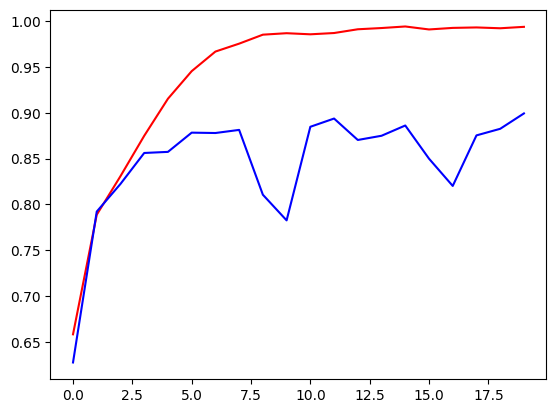

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.show()

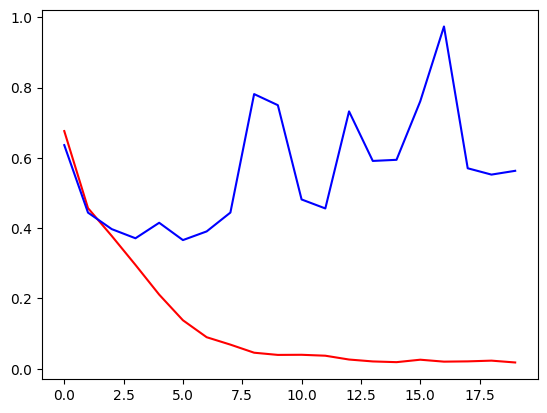

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.show()

In [15]:
#Testing...
import cv2

In [16]:
test_img=cv2.imread("/content/Dog.jpg")

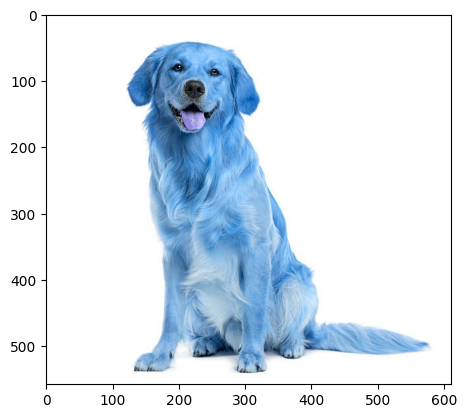

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(558, 612, 3)

In [19]:
test_img=cv2.resize(test_img,(256,256))

In [20]:
test_input=test_img.reshape(1,256,256,3)

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 304ms/step


array([[1.]], dtype=float32)

In [22]:
test_img2=cv2.imread("/content/Cat.jpg")

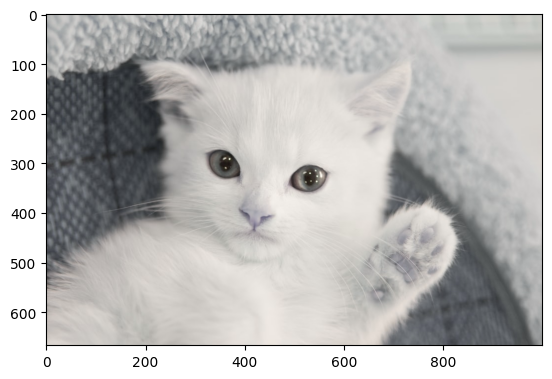

In [24]:
plt.imshow(test_img2)

In [25]:
test_img2=cv2.resize(test_img2,(256,256))

In [26]:
test_input2=test_img2.reshape(1,256,256,3)

In [27]:
model.predict(test_input2)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)